In [1]:
from time import time
import numpy as np
from tst.domutil.util import *
from copy import copy
from scipy.sparse import *
from scipy.spatial.distance import *


def normalise(hc1, hc2, hcboth):
    log1 =  np.log10( hc1 + 1) 
    log2 =  np.log10( hc1 + 1) 
    log3 =  np.log10( hcboth + 1) 
    norm = (log1 + log2) / 2 - log3 
    return norm

from itertools import izip
def sort_coo(m):
    tuples = izip(m.row, m.col, m.data)
    return sorted(tuples, key=lambda x: (x[2]))


/home/shouldsee/.local/lib/python2.7/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


In [2]:
%%time
# print "finished"
# ;
hmms = HMMprofile.objects.defer('text').all().prefetch_related('hits')
hmms = hmms.annotate(hcount = Count('hits')).order_by('id')


hcounts = list(hmms.values_list('hcount',flat = True))
sfs = list(hmms.values_list('cath_node__parent',flat = True))

sDB = seqDB.objects.get(name = 'CATH')
sDB.sequence_set.count()
seq = sDB.sequence_set.first()
# seq.HMMprofile
# seq.hmmprofile
# dir(seq)
seq.hmmprofile_set.count()

CPU times: user 116 ms, sys: 4 ms, total: 120 ms
Wall time: 31.7 s


In [ ]:
%%time

# hmms2hit_ids = lambda hmms: np.expand_dims(
#     np.array(
#     [list(
#         hmm.hits.values_list("id", flat = True)
#     )
#      for hmm in hmms]
# ), axis = 1)

# hmms2hit_ids_para = lambda hmms,pool: np.expand_dims(
#     np.array(
#     [list(
#         hmm.hits.values_list("id", flat = True)
#     )
#      for hmm in hmms]
# ), axis = 1)
X0 = hmms2hit_ids(hmms)

In [8]:
%%time

# t0 = time()
# c = counter(range(len(X)**2/2),per = 1E3)
# from multiprocessing import *

hmms_test = HMMprofile.objects.defer('text').all().prefetch_related('hits')[:200]
# hmms_test = HMMprofile.objects.defer('text').all().prefetch_related('hits')[:500]
X = hmms2hit_ids( hmms_test )

CPU times: user 324 ms, sys: 12 ms, total: 336 ms
Wall time: 442 ms


0.185712814331
19900


In [ ]:
from tst.domutil.util import *
# its = D.iteritems()
its = using_tocoo_izip(D)

xs = []
ys = []
zs = []
sfbools = [];

c = counter(range(6563388),per = 100000)

for xi,yi,inter_ct in its:
    c.count()
#     xct = 
    x = hcounts[xi]
    y = hcounts[yi]

    xs.append( x )
    ys.append( y )
    zs.append(inter_ct)
    sfbools.append(sfs[xi]==sfs[yi])
#     normz = log10()
# print next(its)
# print next(its)

# ys 

In [15]:
c = counter(range(sDB.sequence_set.count()))
seqset_all = sDB.sequence_set.all()

import itertools as it
def pair_gen(seqset_all):
    c = counter(range(seqset_all.count()))
    batches = batch_qs( seqset_all, 500)
    for seqset in batches:
        
#             hmmids = seq.values_list("hmmprofile",flat =True)
        for seq in seqset:
            c.count()
            hmmids = seq.hmmprofile_set.values_list("id",flat = True)
            pairs = it.combinations(sorted(hmmids),2)
            for p in pairs:
                yield p

                
from collections import Counter
import multiprocessing as mp


t0 = time()    
g = pair_gen(seqset_all.all())
counts = Counter(g)
print time()-t0
# set(g)

0 of 80407
100 of 80407
200 of 80407
300 of 80407
400 of 80407
500 of 80407
600 of 80407
700 of 80407
800 of 80407
900 of 80407
1000 of 80407
1100 of 80407
1200 of 80407
1300 of 80407
1400 of 80407
1500 of 80407
1600 of 80407
1700 of 80407
1800 of 80407
1900 of 80407
2000 of 80407
2100 of 80407
2200 of 80407
2300 of 80407
2400 of 80407
2500 of 80407
2600 of 80407
2700 of 80407
2800 of 80407
2900 of 80407
3000 of 80407
3100 of 80407
3200 of 80407
3300 of 80407
3400 of 80407
3500 of 80407
3600 of 80407
3700 of 80407
3800 of 80407
3900 of 80407
4000 of 80407
4100 of 80407
4200 of 80407
4300 of 80407
4400 of 80407
4500 of 80407
4600 of 80407
4700 of 80407
4800 of 80407
4900 of 80407
5000 of 80407
5100 of 80407
5200 of 80407
5300 of 80407
5400 of 80407
5500 of 80407
5600 of 80407
5700 of 80407
5800 of 80407
5900 of 80407
6000 of 80407
6100 of 80407
6200 of 80407
6300 of 80407
6400 of 80407
6500 of 80407
6600 of 80407
6700 of 80407
6800 of 80407
6900 of 80407
7000 of 80407
7100 of 80407
7200

55400 of 80407
55500 of 80407
55600 of 80407
55700 of 80407
55800 of 80407
55900 of 80407
56000 of 80407
56100 of 80407
56200 of 80407
56300 of 80407
56400 of 80407
56500 of 80407
56600 of 80407
56700 of 80407
56800 of 80407
56900 of 80407
57000 of 80407
57100 of 80407
57200 of 80407
57300 of 80407
57400 of 80407
57500 of 80407
57600 of 80407
57700 of 80407
57800 of 80407
57900 of 80407
58000 of 80407
58100 of 80407
58200 of 80407
58300 of 80407
58400 of 80407
58500 of 80407
58600 of 80407
58700 of 80407
58800 of 80407
58900 of 80407
59000 of 80407
59100 of 80407
59200 of 80407
59300 of 80407
59400 of 80407
59500 of 80407
59600 of 80407
59700 of 80407
59800 of 80407
59900 of 80407
60000 of 80407
60100 of 80407
60200 of 80407
60300 of 80407
60400 of 80407
60500 of 80407
60600 of 80407
60700 of 80407
60800 of 80407
60900 of 80407
61000 of 80407
61100 of 80407
61200 of 80407
61300 of 80407
61400 of 80407
61500 of 80407
61600 of 80407
61700 of 80407
61800 of 80407
61900 of 80407
62000 of 8

In [ ]:
hmmids = hmms.values_list('id',flat = True)

In [19]:
%%time
from scipy.sparse import *
# D = csr_matrix(zip(*counts.keys()),counts.values())
# D = coo_matrix(  (counts.values(),  zip(*counts.keys())) ,dtype = 'int') 
# D = dok_matrix((21086,21086),dtype = np.int)
D_curr = dok_matrix((21086,21086),dtype = np.int)
# t0 = time()    
c=counter(counts,per=10000)
for (x,y),v in counts.iteritems():
    c.count()
    D_curr[x-1,y-1] = v
# print time()-t0
D_raw = D_curr

0 of 6577065
10000 of 6577065
20000 of 6577065
30000 of 6577065
40000 of 6577065
50000 of 6577065
60000 of 6577065
70000 of 6577065
80000 of 6577065
90000 of 6577065
100000 of 6577065
110000 of 6577065
120000 of 6577065
130000 of 6577065
140000 of 6577065
150000 of 6577065
160000 of 6577065
170000 of 6577065
180000 of 6577065
190000 of 6577065
200000 of 6577065
210000 of 6577065
220000 of 6577065
230000 of 6577065
240000 of 6577065
250000 of 6577065
260000 of 6577065
270000 of 6577065
280000 of 6577065
290000 of 6577065
300000 of 6577065
310000 of 6577065
320000 of 6577065
330000 of 6577065
340000 of 6577065
350000 of 6577065
360000 of 6577065
370000 of 6577065
380000 of 6577065
390000 of 6577065
400000 of 6577065
410000 of 6577065
420000 of 6577065
430000 of 6577065
440000 of 6577065
450000 of 6577065
460000 of 6577065
470000 of 6577065
480000 of 6577065
490000 of 6577065
500000 of 6577065
510000 of 6577065
520000 of 6577065
530000 of 6577065
540000 of 6577065
550000 of 6577065
560000

4420000 of 6577065
4430000 of 6577065
4440000 of 6577065
4450000 of 6577065
4460000 of 6577065
4470000 of 6577065
4480000 of 6577065
4490000 of 6577065
4500000 of 6577065
4510000 of 6577065
4520000 of 6577065
4530000 of 6577065
4540000 of 6577065
4550000 of 6577065
4560000 of 6577065
4570000 of 6577065
4580000 of 6577065
4590000 of 6577065
4600000 of 6577065
4610000 of 6577065
4620000 of 6577065
4630000 of 6577065
4640000 of 6577065
4650000 of 6577065
4660000 of 6577065
4670000 of 6577065
4680000 of 6577065
4690000 of 6577065
4700000 of 6577065
4710000 of 6577065
4720000 of 6577065
4730000 of 6577065
4740000 of 6577065
4750000 of 6577065
4760000 of 6577065
4770000 of 6577065
4780000 of 6577065
4790000 of 6577065
4800000 of 6577065
4810000 of 6577065
4820000 of 6577065
4830000 of 6577065
4840000 of 6577065
4850000 of 6577065
4860000 of 6577065
4870000 of 6577065
4880000 of 6577065
4890000 of 6577065
4900000 of 6577065
4910000 of 6577065
4920000 of 6577065
4930000 of 6577065
4940000 of 6

In [3]:
%%time
import cPickle as pk

fname = 'data/ISS_raw'


# pk.dump(D_raw.tocoo(),open(  fname ,'wb'))


D_raw = pk.load(open(fname, 'rb'))

CPU times: user 18.3 s, sys: 304 ms, total: 18.6 s
Wall time: 19 s


In [15]:
%%time
c=counter(range(6577065),per=100000)
D_curr = dok_matrix((21086,21086),dtype = np.float)

for x,y,v in using_tocoo_izip(D_raw):
    c.count()
    h1 = hcounts[x]
    h2 = hcounts[y]
    h3 = v
    z = normalise(h1,h2,h3)
    D_curr[x,y] = z
D_norm = D_curr

0 of 6577065
100000 of 6577065
200000 of 6577065
300000 of 6577065
400000 of 6577065
500000 of 6577065
600000 of 6577065
700000 of 6577065
800000 of 6577065
900000 of 6577065
1000000 of 6577065
1100000 of 6577065
1200000 of 6577065
1300000 of 6577065
1400000 of 6577065
1500000 of 6577065
1600000 of 6577065
1700000 of 6577065
1800000 of 6577065
1900000 of 6577065
2000000 of 6577065
2100000 of 6577065
2200000 of 6577065
2300000 of 6577065
2400000 of 6577065
2500000 of 6577065
2600000 of 6577065
2700000 of 6577065
2800000 of 6577065
2900000 of 6577065
3000000 of 6577065
3100000 of 6577065
3200000 of 6577065
3300000 of 6577065
3400000 of 6577065
3500000 of 6577065
3600000 of 6577065
3700000 of 6577065
3800000 of 6577065
3900000 of 6577065
4000000 of 6577065
4100000 of 6577065
4200000 of 6577065
4300000 of 6577065
4400000 of 6577065
4500000 of 6577065
4600000 of 6577065
4700000 of 6577065
4800000 of 6577065
4900000 of 6577065
5000000 of 6577065
5100000 of 6577065
5200000 of 6577065
5300000 

In [3]:
%%time
import cPickle as pk

fname = 'data/ISS_norm'


# pk.dump(D_norm.tocoo(),open(  fname ,'wb'))

# D_test = pk.load(open(fname, 'rb'))
D_norm = pk.load(open(fname, 'rb'))

CPU times: user 15.3 s, sys: 276 ms, total: 15.6 s
Wall time: 15.8 s


In [17]:
%%time

from itertools import izip

def sort_coo(m):
    tuples = izip(m.row, m.col, m.data)
    return sorted(tuples, key=lambda x: (x[2]))


sorted_D_norm = sort_coo(D_norm.tocoo())

CPU times: user 17.4 s, sys: 676 ms, total: 18.1 s
Wall time: 18.1 s


In [ ]:
%%time
import cPickle as pk

fname = 'data/ISS_norm_sorted'


pk.dump(sorted_D_norm,open(  fname ,'wb'))


# sorted_D_norm = pk.load(open(fname, 'rb'))

In [21]:
%%time
# sDnorm[0]
# using_coo_izip
# D_curr = Dnorm
D_curr = D_norm

xdata = []
ydata = []
vdata = []
sfbools = []
for x,y,v in using_tocoo_izip(D_curr):
    xdata.append(x)
    ydata.append(y)
    vdata.append(v)
    sfbools.append(sfs[x]==sfs[y])

CPU times: user 10.7 s, sys: 152 ms, total: 10.9 s
Wall time: 10.8 s


In [18]:
sorted_D_norm[:10]

[(2775, 19584, -3.2755416884013093),
 (2775, 13126, -3.2755416884013093),
 (2775, 11311, -3.2753113545418118),
 (2775, 5157, -3.2751961417856235),
 (2775, 11310, -3.2751961417856235),
 (2775, 20837, -3.2750808984568587),
 (2775, 3443, -3.2747349848727381),
 (2775, 20650, -3.2746196190912382),
 (2775, 20838, -3.2746196190912382),
 (2775, 19585, -3.2745042226558829)]

In [9]:
%%time
pdata_D_norm = zip(*sorted_D_norm)

CPU times: user 14.6 s, sys: 328 ms, total: 14.9 s
Wall time: 14.9 s


<module 'numpy.ma' from '/home/shouldsee/.local/lib/python2.7/site-packages/numpy/ma/__init__.pyc'>

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:49: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer


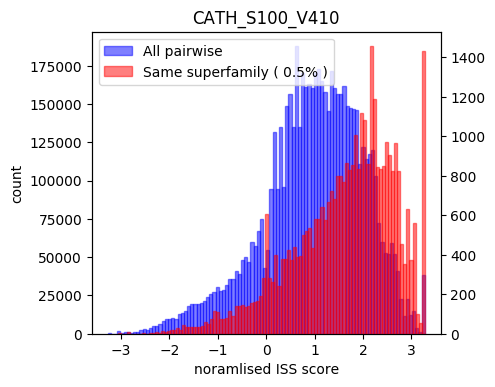

In [64]:
import matplotlib
%matplotlib inline
matplotlib.use("Agg")
from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# kwargs = {
#     'projection':'3d',
# }



kwargs = {'ylabel':'count',
          'xlabel':'noramlised ISS score',
         'title':'CATH_S100_V410',
         }
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
ax1b = ax1.twinx()
# ax1.set_yscale('log')
# ax1.set_xscale('log')

# vals = np.maximum(0,vdata)
# lbls = [None]

lbl = 'All pairwise'
lbls += [ lbl ]
kargs = {'label':lbl}

vals = np.ma.array(vdata,mask = None)

binsA1 = ax1.hist( vals,100, 
    edgecolor = 'b',facecolor = 'b',
    # edgecolor = 'r',facecolor = 'r',
#     marker ='o',
    # c = colors,
#      s =100,
     alpha = 0.5,
     **kargs
#     label = ''
     )



lbl = 'Same superfamily ( 0.5% )'
lbls += [lbl]
vals = np.delete(np.array(vdata), (sfbools) )

kargs = {'label': lbl}

vals = np.array(vdata)[sfbools]

binsB1 = ax1b.hist( vals,100, 
    edgecolor = 'r',facecolor = 'r',
    # edgecolor = 'r',facecolor = 'r',
#     marker ='o',
    # c = colors,
#      s =100,
     alpha = 0.5,
     **kargs
     )
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()

ax1.legend(lines + lines2,
           labels + labels2,
           loc = 2)
# ax1.legend( )
# ax1b.legend( )
# ax1.legend( loc = 1)
# ax1b.legend(loc = 2 )
# plt.legend()

In [ ]:
import matplotlib
%matplotlib inline
matplotlib.use("Agg")
from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# kwargs = {
#     'projection':'3d',
# }



kwargs = {'ylabel':'count',
          'xlabel':'noramlised ISS score',
         'title':'CATH_S100_V410',
         }
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float-(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
ax1b = ax1.twinx()
# ax1.set_yscale('log')
# ax1.set_xscale('log')

# vals = np.maximum(0,vdata)
# lbls = [None]

lbl = 'All pairwise'
lbls += [ lbl ]
kargs = {'label':lbl}

vals = np.ma.array(vdata,mask = None)

binsA1 = ax1.hist( vals,100, 
    edgecolor = 'b',facecolor = 'b',
    # edgecolor = 'r',facecolor = 'r',
#     marker ='o',
    # c = colors,
#      s =100,
     alpha = 0.5,
     **kargs
#     label = ''
     )



lbl = 'Same superfamily ( 0.5% )'
lbls += [lbl]
vals = np.delete(np.array(vdata), (sfbools) )

kargs = {'label': lbl}

# vals = np.array(vdata)[sfbools]

binsB1 = ax1b.hist( vals,100, 
    edgecolor = 'r',facecolor = 'r',
    # edgecolor = 'r',facecolor = 'r',
#     marker ='o',
    # c = colors,
#      s =100,
     alpha = 0.5,
     **kargs
     )
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()

ax1.legend(lines + lines2,
           labels + labels2,
           loc =0)
# ax1.legend( )
# ax1b.legend( )
# ax1.legend( loc = 1)
# ax1b.legend(loc = 2 )
# plt.legend()

In [42]:
sum(sfbools)/ float(len(sfbools))

0.005766717966892044

In [73]:
%%time
# sDnorm[0]
# using_coo_izip
D_curr = D_norm
# D_curr = D_raw

xdata = []
ydata = []
vdata = []
sfbools = []
for x,y,v in using_tocoo_izip(D_curr):
    xdata.append(x)
    ydata.append(y)
    vdata.append(v)
    sfbools.append(sfs[x]==sfs[y])

CPU times: user 11.5 s, sys: 536 ms, total: 12.1 s
Wall time: 12 s


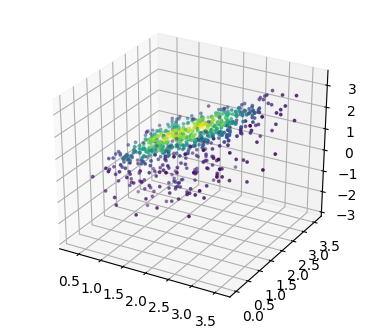

In [75]:
from scipy import stats


import matplotlib
%matplotlib inline
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
kwargs = {
    'projection':'3d',
}
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
# idx = range(1000)

N = 700

xss = [hcounts[xi] for xi in xdata]
yss = [hcounts[xi] for xi in ydata]
zss = np.array(vdata)

# xss = np.array(xss)
# yss = np.array(yss) 
# zss = np.array(zss)

# idx = sfbools
# xss = np.delete(xss,idx)
# yss = np.delete(yss,idx)
# zss = np.delete(zss,idx)

xss= np.array(xss[:N])
yss = np.array(yss[:N])
zss = np.array(zss[:N])

xss = np.log10(xss+1)
yss = np.log10(yss+1)
# zss = np.log10(zss+1)

xyz = np.vstack([xss,yss,zss])
kde = stats.gaussian_kde(xyz)
# ax1.set_zlim([0,2000])

ax1.scatter(xss,yss,zss,'.',3, c = kde([xss,yss,zss]))

X = np.linspace(xss.min(), xss.max(),30)
Y = np.linspace(yss.min(), yss.max(),30)
# Z = np.linspace(zss.min(), zss.max(),30)
# Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X + Y) / 2 - 2
# surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha = 0.5, 
#                        linewidth=0, antialiased=False)

In [54]:
# type(hmms)
hmms[2775]
# hmmid1

<HMMprofile: HMM for 3.30.40.20.1.0 >

In [62]:
type( lst[1][0])

numpy.int32

In [ ]:
%%time
# sDnorm[0]
# using_coo_izip
D_curr = D_norm
# D_curr = D_raw

xdata = []
ydata = []
vdata = []
sfbools = []
for x,y,v in using_tocoo_izip(D_curr):
    xdata.append(x)
    ydata.append(y)
    vdata.append(v)
    sfbools.append(sfs[x]==sfs[y])

In [4]:
%%time
# lst = sorted_D_norm
# ?lst = 
D_curr = D_norm
lst = sort_coo(D_curr.tocoo())

In [5]:
newlst = []
for x,y,v in lst:
    if sfs[x]!=sfs[y]:
        newlst.append((x,y,v))
    

In [6]:
lst = newlst
c = counter(lst,per = 1)
i = 0

# for idxx,idxy in lst:

# for i,(hmmid1,hmmid2,v) in enumerate(lst):
for hmmid1,hmmid2,v in lst:
    
#     print hmms[ int(hmmid1) ]
#     print hmms[ int(hmmid2) ]
    hmmid1 = int(hmmid1)
    hmmid2 = int(hmmid2)
    hmm1 = hmms[ hmmid1 ]
    hmm2 = hmms[ hmmid2 ]
#     raise
#     if hmm1.cath_node.parent == hmm2.cath_node.parent:
    cnode1 = hmm1.cath_node
    cnode2 = hmm2.cath_node
    if cnode1.Class == cnode2.Class:
        continue
#     if sfbools[i]:
#         continue
    c.count()   
    
    if c.i >= 2:
        i+=1
        print hmm1
        print hmm2
        print v
        print hmm1.hits.count() + hmm2.hits.count()
        print "http://xhits.cathdb.info/crosshits.php?sf2=%s&sf1=%s&db_source=Crosshits_v4_1_0"%(cnode1.superfamily(),cnode2.superfamily())
        if i == 2:
            break

0 of 6435678
1 of 6435678
HMM for 3.30.40.20.1.0 
HMM for 2.30.30.40.49.0 
-3.27473498487
310
http://xhits.cathdb.info/crosshits.php?sf2=3.30.40.20&sf1=2.30.30.40&db_source=Crosshits_v4_1_0
2 of 6435678
HMM for 3.30.40.20.1.0 
HMM for 1.25.40.10.69.0 
-3.27450422266
212
http://xhits.cathdb.info/crosshits.php?sf2=3.30.40.20&sf1=1.25.40.10&db_source=Crosshits_v4_1_0


In [46]:
key_v = sorted_D_norm[0]
print key_v
# D_temp = D_norm.toarray()

(2775, 19584, -3.2755416884013093)


In [16]:
D_temp[D_temp.nonzero()]
# D_temp

array([2, 3, 3, ..., 4, 1, 3])

In [7]:
# hmmid1,hmmid2, v = key_v
# hmmid1 += 1
# hmmid2 += 

hmm1 = HMMprofile.objects.get(id = hmmid1 )
hmm2 = HMMprofile.objects.get(id = hmmid2 )

inter_hitseq = hmm1.hits.all() & hmm2.hits.all()
hits1 = hmm1.hit4hmm2hsp_set.filter(target__in = inter_hitseq)
hits2 = hmm2.hit4hmm2hsp_set.filter(target__in = inter_hitseq)


fmt = "%s,\t domain:%s\t length:%s,\t hitnum:%d"
print "intersection count is",inter_hitseq.count()
print  fmt %(hmm1,hmm1.cath_node.domain, p_hmmlen.findall(hmm1.text)[0], hmm1.hits.count() )
print fmt % (hmm2,hmm2.cath_node.domain, p_hmmlen.findall(hmm2.text)[0], hmm2.hits.count() )
for i,j in zip(hits1,hits2):
    try:
        node =  domain.objects.get(domain_id = i.target.acc).classification
    except:
        node = ''
    print i.target.acc,i.bitscore,
    print j.target.acc,j.bitscore
#     print node
    print i.start,j.start
    print i.end,j.end

intersection count is 0
HMM for 3.30.40.20.1.0 ,	 domain:1mbmB03	 length:47,	 hitnum:1
HMM for 1.25.40.10.69.0 ,	 domain:4i1aB02	 length:228,	 hitnum:211


In [ ]:
#### Pairwise calculation


def ISS(u,v):
#     c.count()
    u = u[0]; v = v[0]
    ulen = len(u)
    vlen = len(v)
#     if ulen <= vlen:
#         inter_count = sum(u_curr in v for u_curr in u )
#     else:
#         inter_count = sum(u_curr in u for u_curr in v )
    inter_count = len(set(u) & set(v))
    d = 1 - float(2*inter_count)/(ulen+vlen+1)

    return d

def ISS0(x):
#     c.count()
    return(ISS(*x))
def ISS1(xs):
#     c.count()
    return([ISS(*x) for x in xs] )

# ISS0 = lambda x: ISS(*x)
# ISS1 = lambda xs: [ISS(*x) for x in xs]


hmms2hit_ids = lambda hmms: np.expand_dims(
    np.array(
    [list(
        hmm.hits.values_list("id", flat = True)
    )
     for hmm in hmms]
), axis = 1)

hmms2hit_ids_para = lambda hmms,pool: np.expand_dims(
    np.array(
    [list(
        hmm.hits.values_list("id", flat = True)
    )
     for hmm in hmms]
), axis = 1)
# X = np.expand_dims(
#     np.array(
#     [list(
#         hmm.hits.values_list("id", flat = True)
#     )
#      for hmm in hmms]
# ), axis = 1)
def batch(X,batch_size = 5 ):
    lst = []
    i = 0
    for x in X:
        i += 1
        lst += [x]
        if not i % batch_size:
            yield lst
            lst = []
# print next(g)

def queue_gen(X):
    i = 0
    for ui,u in enumerate(X):
        for v in X[ui+1:]:
            i += 1
            yield [u,v]

import multiprocessing as mp

p = mp.Pool(7)
# if 1:
N = 1
t0 = time()
for i in range(N):
    if __name__ == '__main__':
        dm = (p.map_async(ISS0, (queue_gen(X))))
        dm1 = dm.get()
    #     sum(p.map(ISS1, batch(queue_gen(X)), 200),[] )
print time()-t0 

N = 1
t0 = time()
for i in range(N):
    if __name__ == '__main__':
        dm = (p.imap(ISS0, (queue_gen(X))))
        l = sum(1 for _ in dm)
print l
# sum(p.map(ISS1, batch(queue_gen(X)), 200),[] )
# print time()-t0 

p.close()
